In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

# Numpy introduction
If necessary, go through some of the basic numpy function.  
Can also all be found here: https://docs.scipy.org/doc/numpy/user/quickstart.html

In [49]:
np.zeros((5,7))

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [50]:
np.ones((5,7))

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [54]:
np.ones((2,3,2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [63]:
A = np.random.randint(0,100,(5,7)).T
A

array([[88,  6, 32, 51, 87],
       [85, 52, 98, 87, 83],
       [67, 34, 50, 18, 78],
       [ 0, 20, 40, 25, 19],
       [45, 81, 46,  4, 35],
       [87, 66, 12, 92, 57],
       [16, 62, 55, 49,  3]])

In [65]:
A.shape, A.size, A.ndim, A.dtype 

((7, 5), 35, 2, dtype('int32'))

In [67]:
A.reshape(A.size)

array([88,  6, 32, 51, 87, 85, 52, 98, 87, 83, 67, 34, 50, 18, 78,  0, 20,
       40, 25, 19, 45, 81, 46,  4, 35, 87, 66, 12, 92, 57, 16, 62, 55, 49,
        3])

In [69]:
np.arange(20).reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [71]:
np.arange(20).reshape(4,5)**2

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361]], dtype=int32)

In [74]:
np.linspace(-5, 5, 10)

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [79]:
np.concatenate([np.arange(10,20), np.arange(24,30)])

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29])

In [81]:
np.hstack([np.arange(10,20), np.arange(24,30)])

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29])

# Particle diffusion simulation

### 1. Using python comprehesions

In [2]:
n_particles = 100
x0 = 0
y0 = 0
D = 1

particles = []
for i in range(n_particles):
    particles.append((x0, y0))

from random import random
def diffuse_list(particles, steps):
    for i in range(steps):
        particles = [(x + D*random(),y + D*random()) for (x,y) in particles]
    return particles

In [3]:
%%time
n_particles = 10000

# Initialize particles
particles = []
for i in range(n_particles):
    particles.append((x0, y0))
    
particles = diffuse_list(particles, 1000)

Wall time: 2.88 s


### 2. Using numpy

In [13]:
n_particles = 100
x0 = 0
y0 = 0
D = 1

# Initialize particles
particles = np.array([x0, y0]) * np.ones((n_particles, 2))

def diffuse(particles, D, steps):
    """ Particle diffusion simulation.
    Step-per-step particle displacement by gaussian distributed random number.
    """
    for i in range(steps):
        particles += D*np.random.randn(particles.shape[0], particles.shape[1])
    return particles

particles = diffuse(particles, D, 100)
particles[:10]

array([[ -7.87186946,  -1.29082262],
       [ 15.47923475, -13.73288293],
       [-16.62418696,  13.3507096 ],
       [-16.21925537,  -7.73123293],
       [  2.38618106,  -8.18825849],
       [ 24.52692814, -23.78055853],
       [-12.66675904,   1.87420524],
       [ -9.25182421,  -0.6418327 ],
       [  2.28457781,  20.45174802],
       [ -7.15201578,  -5.9900186 ]])

In [16]:
%%time
n_particles = 10000

particles = np.array([x0, y0]) * np.ones((n_particles, 2))
particles = diffuse(particles, D, 1000)

Wall time: 488 ms


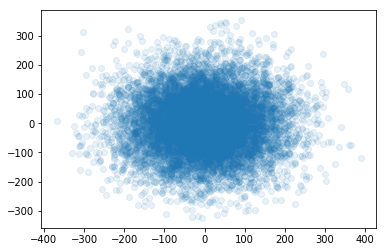

In [17]:
x0, y0 = 0, 0
particles = np.array([x0, y0]) * np.ones((n_particles, 2))
particles = diffuse(particles, 1, 10000)

plt.scatter(particles[:,0], particles[:,1], alpha=0.1)

In [148]:
particles = particle_diffusion(10000, 0, 0, 1, 1000)

C:\Users\FlorianHuber\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-100, 100)

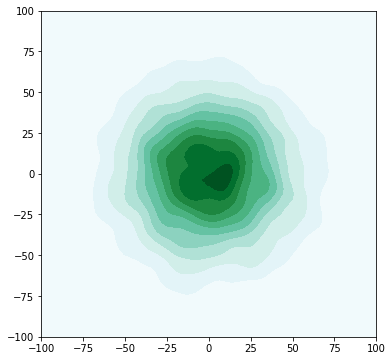

In [153]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(particles[:,0], particles[:,1], ax=ax, shade=True)#, cbar=True)
plt.xlim(-100,100)
plt.ylim(-100,100)

C:\Users\FlorianHuber\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-100, 100)

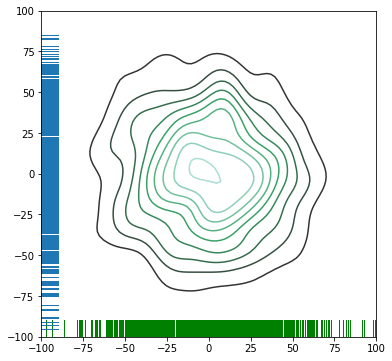

In [144]:
particles = particle_diffusion(1000, 0, 0, 1, 1000)

f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(particles[:,0], particles[:,1], ax=ax)
sns.rugplot(particles[:,0], color="g", ax=ax)
sns.rugplot(particles[:,1], vertical=True, ax=ax);
plt.xlim(-100,100)
plt.ylim(-100,100)

### Collect data in 3-dimensional array

In [20]:
def collect_data(num_particles, steps_lst):
    data_collection = np.zeros((num_particles, 2, len(steps_lst)))
    
    # Initialize particles
    x0, y0 = 0, 0
    D = 1
    particles = np.array([x0, y0]) * np.ones((num_particles, 2))
    for i, steps in enumerate(steps_lst):
        particles = diffuse(particles, D, steps)
        data_collection[:,:,i] = particles
        
    return data_collection

data_collection = collect_data(1000, 20*[100])

### Some more numpy slicing - get track of individual particles

In [22]:
track = data_collection[0,:,:] # get track of individual particle
track.shape

(2, 20)

(-12.479246571734983,
 26.317720974301746,
 -74.46038627915712,
 -1.0885513012232768)

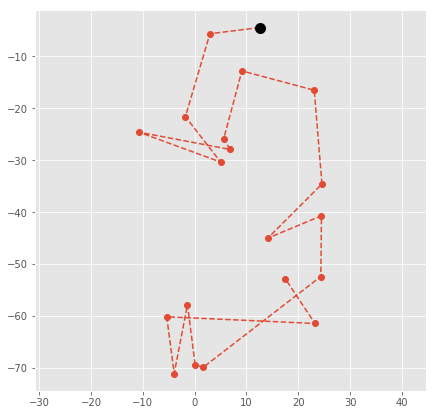

In [47]:
ID = 111

plt.figure(figsize=(7,7))
plt.style.use('ggplot')
plt.plot(data_collection[ID,0,:], data_collection[ID,1,:], 'o--')
plt.plot(data_collection[ID,0,0], data_collection[ID,1,0], 'o', color='black', markersize=10)
plt.axis('equal')

### Create animation of particle density over time

C:\Users\FlorianHuber\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


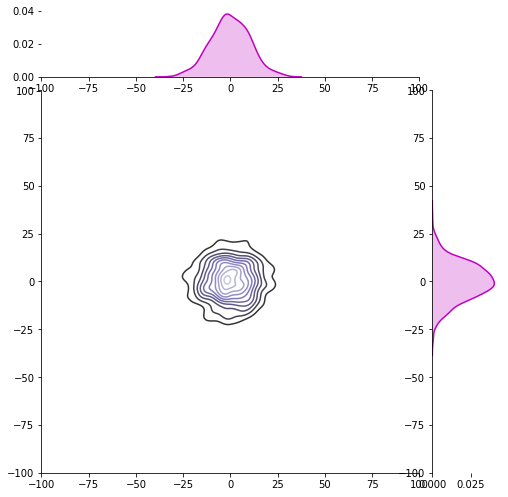

In [21]:
limit = (-100, 100)

import matplotlib.animation
from IPython.display import HTML

x = data_collection[:,0, 0]
y = data_collection[:,1, 0]
g = sns.JointGrid(x=x, y=y, size=7)

def prep_axes(g, xlim, ylim):
    g.ax_joint.clear()
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    g.ax_marg_x.clear()
    g.ax_marg_x.set_xlim(xlim)
    g.ax_marg_y.clear()
    g.ax_marg_y.set_ylim(ylim)
    """plt.setp(g.ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_x.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_xticklabels(), visible=False)"""

def animate(i):
    g.x = data_collection[:,0, i]
    g.y = data_collection[:,1, i]
    prep_axes(g, limit, limit)
    g.plot_joint(sns.kdeplot, cmap="Purples_d") #, shade=True)
    g.plot_marginals(sns.kdeplot, color="m", shade=True)

frames=np.arange(0,20)
ani = matplotlib.animation.FuncAnimation(g.fig, animate, frames=frames, repeat=True)

#plt.show()
HTML(ani.to_html5_video())

## calculate with numpy arrays

(array([1035., 2198., 2599., 2033., 1209.,  598.,  222.,   87.,   16.,
           3.]), array([  1.14632201,  44.53130117,  87.91628032, 131.30125947,
        174.68623863, 218.07121778, 261.45619693, 304.84117609,
        348.22615524, 391.61113439, 434.99611355]), <a list of 10 Patch objects>)

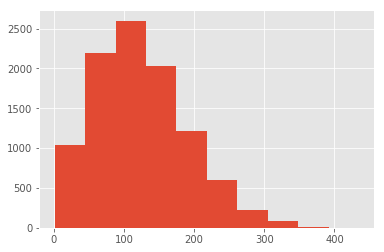

In [91]:
distances = np.sqrt(particles[:,0]**2 + particles[:,1]**2)
plt.hist(distances)

In [84]:
distances_collect = np.sqrt(data_collection[:,0,:]**2 + data_collection[:,1,:]**2)
distances_collect.shape

(1000, 20)

(array([ 62., 130., 195., 193., 153., 126.,  69.,  53.,  12.,   7.]),
 array([  1.60289363,  16.29610874,  30.98932385,  45.68253896,
         60.37575407,  75.06896918,  89.76218429, 104.4553994 ,
        119.14861451, 133.84182963, 148.53504474]),
 <a list of 10 Patch objects>)

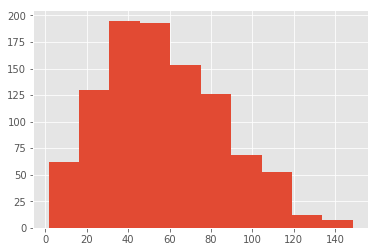

In [92]:
plt.hist(distances_collect[:,19])

In [98]:
b.shape, a.shape

((21,), (20,))

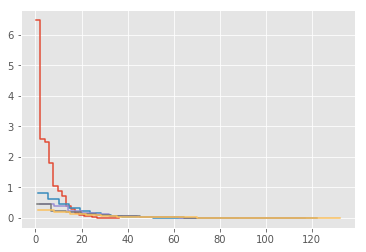

In [106]:
n_bins = 20
selection = [0,4,8,12,16]
for i in selection:
    a,b = np.histogram(distances_collect[:,i], n_bins)
    plt.step(b[:-1], a/b[1:]**2, where='post')

### Select particles that diffused the farthest 

In [107]:
# use np.where... e.g.
np.where(distances_collect[:,:] > 150)

(array([735, 847, 951], dtype=int64), array([13, 15, 18], dtype=int64))

In [117]:
np.where(distances_collect[:,:] > 150)

(array([735, 847, 951], dtype=int64), array([13, 15, 18], dtype=int64))

(-80.48657817912041,
 49.38066162402112,
 -155.71013541998943,
 165.48612721711763)

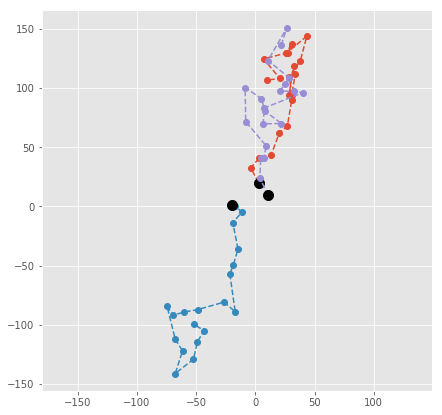

In [115]:
IDs = np.where(distances_collect[:,:] > 150)[0]

plt.figure(figsize=(7,7))
plt.style.use('ggplot')
for ID in IDs:
    plt.plot(data_collection[ID,0,:], data_collection[ID,1,:], 'o--')
    plt.plot(data_collection[ID,0,0], data_collection[ID,1,0], 'o', color='black', markersize=10)
plt.axis('equal')